In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
data_raw = pd.read_csv('/Users/darryl/Desktop/Data Science Portfolio/Scotch V2/scotch.csv')

In [3]:
print(data_raw.head())

   RowID Distillery  Body  Sweetness  Smoky  Medicinal  Tobacco  Honey  Spicy  \
0      1  Aberfeldy     2          2      2          0        0      2      1   
1      2   Aberlour     3          3      1          0        0      4      3   
2      3     AnCnoc     1          3      2          0        0      2      0   
3      4     Ardbeg     4          1      4          4        0      0      2   
4      5    Ardmore     2          2      2          0        0      1      1   

   Winey  Nutty  Malty  Fruity  Floral    Postcode  Latitude  Longitude  
0      2      2      2       2       2  \tPH15 2EB    286580     749680  
1      2      2      3       3       2  \tAB38 9PJ    326340     842570  
2      0      2      2       3       2   \tAB5 5LI    352960     839320  
3      0      1      2       1       0  \tPA42 7EB    141560     646220  
4      1      2      3       1       1  \tAB54 4NH    355350     829140  


In [4]:
data_raw_drop = data_raw.drop(['RowID', 'Postcode', 'Latitude', 'Longitude', 'Distillery'], axis = 1)

In [5]:
print(data_raw_drop.head())

   Body  Sweetness  Smoky  Medicinal  Tobacco  Honey  Spicy  Winey  Nutty  \
0     2          2      2          0        0      2      1      2      2   
1     3          3      1          0        0      4      3      2      2   
2     1          3      2          0        0      2      0      0      2   
3     4          1      4          4        0      0      2      0      1   
4     2          2      2          0        0      1      1      1      2   

   Malty  Fruity  Floral  
0      2       2       2  
1      3       3       2  
2      2       3       2  
3      2       1       0  
4      3       1       1  


In [6]:
features = data_raw_drop.iloc[0]

In [7]:
data_raw_drop = scale(data_raw_drop)

In [8]:
print(data_raw_drop)

[[-0.07542547 -0.40765084  0.54172898 ...  0.31606376  0.25509887
   0.35566418]
 [ 1.00567291  0.99466805 -0.62298833 ...  1.91497456  1.54559904
   0.35566418]
 [-1.15652385  0.99466805  0.54172898 ...  0.31606376  1.54559904
   0.35566418]
 ...
 [-2.23762223  0.99466805 -0.62298833 ...  0.31606376 -1.0354013
   0.35566418]
 [-0.07542547 -0.40765084 -0.62298833 ... -1.28284703 -2.32590146
  -1.99719114]
 [-0.07542547  0.99466805 -1.78770563 ...  0.31606376  0.25509887
  -0.82076348]]


In [9]:
pca = decomposition.PCA(n_components=3)
pca.fit(data_raw_drop)

PCA(n_components=3)

In [10]:
scores = pca.transform(data_raw_drop)

In [11]:
scores_df = pd.DataFrame(scores, columns=['PC1', 'PC2', 'PC3'])
scores_df

,PC1,PC2,PC3
0,-0.655657,1.205646,0.166344
1,-2.312631,3.747988,-1.366919
2,-1.602153,-0.664082,0.297205
3,5.413633,0.244875,-1.210142
4,0.121649,0.412793,0.304462
...,...,...,...
81,-0.742283,-1.867255,-0.447354
82,0.266400,0.367942,1.014124
83,-1.652609,-0.839780,0.123563
84,0.888804,-0.713645,2.996897


In [12]:
distillery = data_raw['Distillery']

In [13]:
df_scores = pd.concat([scores_df, distillery], axis=1)
print(df_scores)

         PC1       PC2       PC3    Distillery
0  -0.655657  1.205646  0.166344     Aberfeldy
1  -2.312631  3.747988 -1.366919      Aberlour
2  -1.602153 -0.664082  0.297205        AnCnoc
3   5.413633  0.244875 -1.210142        Ardbeg
4   0.121649  0.412793  0.304462       Ardmore
..       ...       ...       ...           ...
81 -0.742283 -1.867255 -0.447354     Tobermory
82  0.266400  0.367942  1.014124       Tomatin
83 -1.652609 -0.839780  0.123563     Tomintoul
84  0.888804 -0.713645  2.996897       Tormore
85  0.095250 -0.735940  0.117929  Tullibardine

[86 rows x 4 columns]


In [14]:
loadings = pca.components_.T
df_loadings = pd.DataFrame(loadings, columns=['PC1', 'PC2','PC3'], index= features)
df_loadings

,PC1,PC2,PC3
0,,,
2,0.292996,0.482976,0.087838
2,-0.251049,-0.011578,0.450002
2,0.464131,0.141070,-0.155765
0,0.486891,-0.075954,-0.066295
0,0.308027,-0.048624,-0.045715
2,-0.248763,0.431355,0.003370
1,0.054924,0.263284,-0.561638
2,-0.051674,0.552041,0.264718
2,-0.068896,0.299018,0.174951


In [15]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.26975719, 0.15937839, 0.10024746])

In [16]:
explained_variance = np.insert(explained_variance, 0, 0)

In [17]:
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))

In [18]:
pc_df = pd.DataFrame(['','PC1', 'PC2', 'PC3'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

In [19]:
df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.269757,0.270
2,PC2,0.159378,0.429
3,PC3,0.100247,0.529


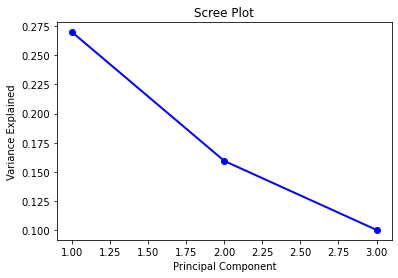

In [20]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [21]:
## We have our 3 principal components. Now lets cluster using them.
## Elbow Curve to determine optimal number of clusters.

In [22]:
from sklearn.cluster import KMeans

In [23]:
inertia = []
range_of_clusters = list(range(2,16))
for k in range_of_clusters:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(scores_df)
    inertia.append(kmeans.inertia_)

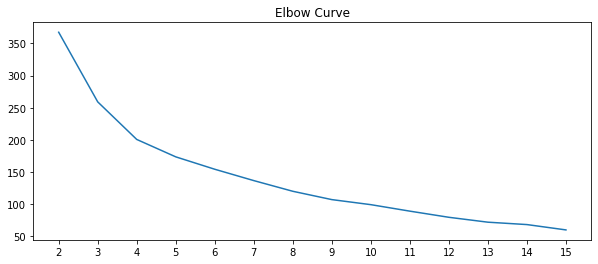

In [24]:
plt.figure(figsize = (10,4))
plt.plot (range_of_clusters, inertia)
plt.xticks(range_of_clusters)
plt.title('Elbow Curve')
plt.show()

In [25]:
## 4 is the elbow and therefore optimal

In [26]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(scores_df)

KMeans(n_clusters=4)

In [27]:
df_kmeans = df_scores.copy()
df_kmeans['Cluster'] = kmeans.labels_
print(df_kmeans)

         PC1       PC2       PC3    Distillery  Cluster
0  -0.655657  1.205646  0.166344     Aberfeldy        3
1  -2.312631  3.747988 -1.366919      Aberlour        3
2  -1.602153 -0.664082  0.297205        AnCnoc        0
3   5.413633  0.244875 -1.210142        Ardbeg        1
4   0.121649  0.412793  0.304462       Ardmore        2
..       ...       ...       ...           ...      ...
81 -0.742283 -1.867255 -0.447354     Tobermory        0
82  0.266400  0.367942  1.014124       Tomatin        2
83 -1.652609 -0.839780  0.123563     Tomintoul        0
84  0.888804 -0.713645  2.996897       Tormore        2
85  0.095250 -0.735940  0.117929  Tullibardine        2

[86 rows x 5 columns]


In [28]:
## 3d scatterplot

In [29]:
from mpl_toolkits import mplot3d

In [30]:
x = df_kmeans['PC2']
y = df_kmeans['PC1']
z = df_kmeans['PC3']

Text(0.5, 0.92, '3d Scatter plot by principal components')

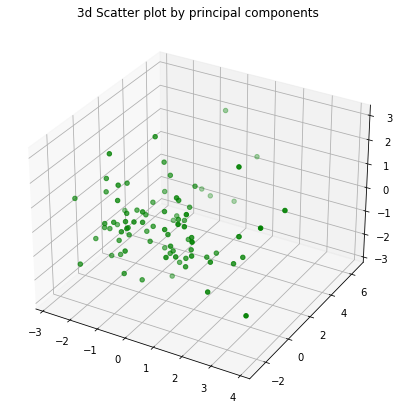

In [31]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(x, y, z, color = "green")
plt.title("3d Scatter plot by principal components")


In [32]:
df_kmeans.to_csv('scotch_v2_final.csv')